# 1. Look at data 

In [38]:
import pandas as pd
from typing import List

# Load the Excel file
data_file: pd.ExcelFile = pd.ExcelFile('../data/Raw_data.xlsx')

# Check the sheet names
sheet_names: List = data_file.sheet_names
assert sheet_names == ['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [39]:
# Load each sheet into a dataframe
transaction_data: pd.DataFrame = pd.read_excel('../data/Raw_data.xlsx', sheet_name='Transactions')

In [40]:
transaction_data.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [41]:
# Get the info of all files
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

# 2. Check for missing values

In [42]:
# Check for number of missing values
print(f"NULL COUNTS = \n{transaction_data.isnull().sum()}\n")  # We have null values on multiple columns

NULL COUNTS = 
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64



In [43]:
# Percentage of rows in each column with missing data

print(f"PERCENTAGE OF MISSING VALUES = \n{transaction_data.isnull().mean()*100}")

PERCENTAGE OF MISSING VALUES = 
transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64


# 3. Remove NaN
## 3.1 online_order
- Online order column has 1.8% rows witj missing values.
- Let's have a look at Online order column

In [44]:
transaction_data['online_order'].head(5)  # This column has all 1/0 values

0    0.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: online_order, dtype: float64

In [46]:
# Rows with Null online_order

transaction_data[transaction_data['online_order'].isnull()].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,37823.0
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,38482.0
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,37838.0
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,42145.0
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,35455.0


- We will use Mode imputation to the online_order column - why?
1. Data size is big and percentage missing value is small (1.8%) - so it can tolerate this simple method.
2. This column has categorical data.

In [12]:
# Calculate mode of column online_order
mode_online_order = transaction_data['online_order'].mode()[0]  
assert mode_online_order == 1  

# Fill missing values with mode value
transaction_data['online_order'].fillna(mode_online_order, inplace=True)

# Check if for missing value in online_order
assert transaction_data['online_order'].isnull().sum() == 0

# Check an imputed row
transaction_data[transaction_data['transaction_id']==98]['online_order']  # Null at transaction_id 98 is replaced with 1.0

97    1.0
Name: online_order, dtype: float64

## 3.2 Other columns

In [13]:
# Check other Null columns with some percentage

other_null_columns = ['brand',	'product_line',	'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']
transaction_data.loc[transaction_data['brand'].isnull(), other_null_columns]   # All these columns have Null at same rows

# Number of row with NaN brand (and others) values
assert len(transaction_data[transaction_data['brand'].isnull()]) == 197

- We will remove these columns - why? -  Missing percentage is small.

In [14]:
# Remove the all left missing value rows
transaction_data = transaction_data.dropna()

# Number of rows in transaction_data after dropping rows
assert len(transaction_data) == 19803

# Check in dataset for any Null value
assert transaction_data.isnull().any().sum() == 0


# 4. Transaction Data Analysis

## 4.1 Profit Calculation
- profit = (list_price - standard_cost)

In [49]:
# Add a new column 'profit'
transaction_data['profit'] = transaction_data['list_price'] - transaction_data['standard_cost']  
transaction_data.head(2) 

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55


## 4.2 Brand wise analysis
- Group customers - brand wise
- Count number of customers - brand wise
- Total profit - brand wise

In [16]:
# Group brand wise
brand_grp = transaction_data.groupby('brand')

# Unique brands list
for brand, group in brand_grp:
    print(brand)

Giant Bicycles
Norco Bicycles
OHM Cycles
Solex
Trek Bicycles
WeareA2B


### (a) Brandwise customers

In [50]:
# Aggregate number of customers in each brand group
brandwise_cust = brand_grp.agg({'customer_id':'count'}).reset_index()
brandwise_cust

,brand,customer_id
0,Giant Bicycles,3312
1,Norco Bicycles,2910
2,OHM Cycles,3043
3,Solex,4253
4,Trek Bicycles,2990
5,WeareA2B,3295


- So, brands and their customers number seems not much relatable by data, here.
- Let's analyse brandwise profit.

### (b) Brandwise profits

In [52]:
# Agreegate profit sum under each brand 
brandwise_profit = brand_grp.agg({'profit': 'sum'}).reset_index()
brandwise_profit

,brand,profit
0,Giant Bicycles,1.573840e+06
1,Norco Bicycles,8.676838e+05
2,OHM Cycles,1.483039e+06
3,Solex,2.413852e+06
4,Trek Bicycles,1.837974e+06
5,WeareA2B,2.753895e+06


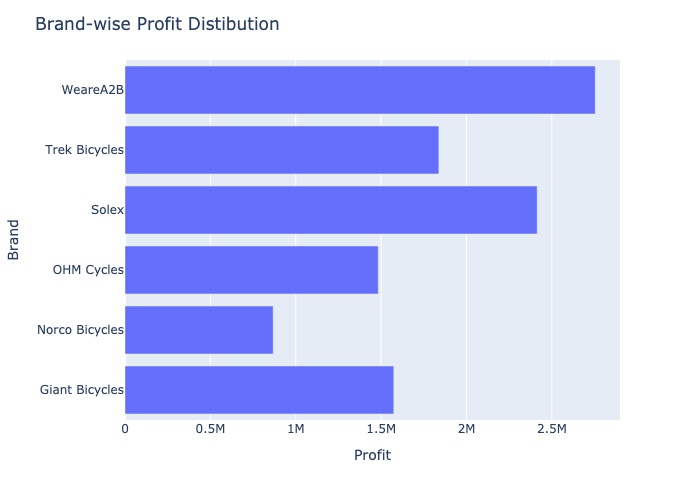

In [56]:
# Plot brand wise profit distribution

import plotly.express as px
import plotly.io as pio 
from IPython.display import Image

# Create a Bar plot
fig = px.bar(brandwise_profit, x='profit', y= 'brand', orientation='h')


# Update the layout
fig.update_layout(
    title='Brand-wise Profit Distibution',
    xaxis_title = 'Profit',
    yaxis_title = 'Brand',
    showlegend=False
)

# Show the Figure
# fig.show()  

# Save the figure as a static image
pio.write_image(fig, 'brandwise_profit.png')

# Display the image in the notebook
Image('brandwise_profit.png')

# 5. Export file

In [59]:
# Write csv file of cleaned data
transaction_data.to_csv('transaction_data_cleaned.csv', index = False)

In [58]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n